In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

## 1. default.csv 자료를 이용해 아래 질문에 대답하시오

### 1-1. 더미변수 변환 밎 숫자형 변수 표준화

In [2]:
df_ori = pd.read_csv('./Data/default.csv')
df = pd.read_csv('./Data/default.csv')

df['student'] = np.where(df['student']=='Yes', 1, 0)
df['default'] = np.where(df['default']=='Yes', 1, 0)
scaler = StandardScaler()
df[['balance', 'income']] = scaler.fit_transform( df[['balance', 'income']] )

df


,default,student,balance,income
0,0,0,-0.218835,0.813187
1,0,1,-0.037616,-1.605496
2,0,0,0.492410,-0.131212
3,0,0,-0.632893,0.164031
4,0,0,-0.102791,0.370915
...,...,...,...,...
9995,0,0,-0.255990,1.460366
9996,0,0,-0.160044,-1.039014
9997,0,0,0.020751,1.883565
9998,0,0,1.516742,0.236363


### 1-2. 전체를 훈련용 데이터 셋이라 생각해, 이항로지스틱 회귀모형 훈련

In [3]:
from sklearn.linear_model import LogisticRegression
X_train = df.to_numpy()[:, 1:]
y_train = df.to_numpy()[:,0]
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [4]:
lr_clf.coef_, lr_clf.intercept_

(array([[-0.6017408 ,  2.73797718,  0.05238052]]), array([-5.93161678]))

### 1-3. 추정된 패러미터를 이용해, 로지스틱 회귀모형을 식으로 표현 

#### $$ \mu\left(\text{student, balance, income}\right)\,=\,\sigma \left(-5.931617 \,-0.6017408\,\times\,\text{Student}\,+\,2.73797718\,\times\,\text{balance}\,+\,0.05238052\,\times\,\text{income}  \right)$$

#### $$ \text{st.} \quad \sigma(x) = \frac{1}{1+exp(-x)} $$

### 1-4 새로운 데이터의 Default 확률 (학생, 잔고 900, 수입 7100)

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


a = lr_clf.intercept_
b = lr_clf.coef_
coeffs = np.c_[a, b]

In [6]:
coeffs

array([[-5.93161678, -0.6017408 ,  2.73797718,  0.05238052]])

In [7]:
values = np.array([1, 900, 7100]).reshape(1,3)
values_scaler = scaler.fit_transform(np.vstack([df_ori[['balance', 'income']].to_numpy(), values[:,1:]]))
new = np.hstack([ np.ones((1, 2)), values_scaler[-1].reshape(1,2)])

new_pred_y = sigmoid(coeffs @ new.T)

print(f"New Customer's Default Probability = {np.round(new_pred_y.item() * 100, 4)}%")

New Customer's Default Probability = 0.1886%


## 2. 소프트맥스

### 2-1. $\theta_1$ 가장 확률 높은 범주로 분류해주기

In [8]:
np.random.seed(123)
traindt = np.hstack( [np.ones((5,1)),\
                      np.around( np.random.randn(5,4), 3),
                      np.random.randint(1,4,(5,1))] )

traindt

array([[ 1.   , -1.086,  0.997,  0.283, -1.506,  2.   ],
       [ 1.   , -0.579,  1.651, -2.427, -0.429,  1.   ],
       [ 1.   ,  1.266, -0.867, -0.679, -0.095,  1.   ],
       [ 1.   ,  1.491, -0.639, -0.444, -0.434,  1.   ],
       [ 1.   ,  2.206,  2.187,  1.004,  0.386,  3.   ]])

In [9]:
X = traindt[:, :5]
y = traindt[:, 5]

In [10]:
theta_1 = np.vstack(([5, 2, 3, 1, 4],
                     [2, 4, 3, 1, 2],
                     [3, 4, 1, 5, 4]))

In [11]:
prob_1 = sigmoid(theta_1 @ X.T) / sigmoid(theta_1 @ X.T).sum(axis=0)
#np.round(prob_1, 6)
prob_1.T

array([[8.15090265e-01, 1.73939453e-01, 1.09702821e-02],
       [5.54924306e-01, 4.45070109e-01, 5.58494333e-06],
       [3.35339710e-01, 3.33162355e-01, 3.31497936e-01],
       [3.31186331e-01, 3.35048941e-01, 3.33764728e-01],
       [3.33333332e-01, 3.33333333e-01, 3.33333335e-01]])

In [12]:
pred_y_1 = np.argmax(prob_1, axis=0)
pred_prob_1 = np.max(prob_1, axis=0)
pred_y_1, pred_prob_1

(array([0, 0, 0, 1, 2]),
 array([0.81509027, 0.55492431, 0.33533971, 0.33504894, 0.33333333]))

### 2.2 $\theta_2$ 높은 확률 범주로 분류해주기

In [13]:
theta_2 = np.vstack([[5.5, 2. , 3. , 1.5, 4. ],
                     [2. , 3.5, 2.5, 1. , 1.5],
                     [3. , 4. , 1. , 5. , 4. ]])

prob_2 = sigmoid(theta_2 @ X.T) / sigmoid(theta_2 @ X.T).sum(axis=0)
#np.round(prob_2, 8)
prob_2

array([[7.50325205e-01, 5.70978939e-01, 3.36504743e-01, 3.32496896e-01,
        3.33333339e-01],
       [2.41873824e-01, 4.29015258e-01, 3.31851501e-01, 3.34055042e-01,
        3.33333322e-01],
       [7.80097033e-03, 5.80307405e-06, 3.31643756e-01, 3.33448063e-01,
        3.33333339e-01]])

In [14]:
pred_y_2 = np.argmax(prob_2, axis=0)
pred_prob_2 = np.max(prob_2, axis=0)
pred_y_2, pred_prob_2

(array([0, 0, 0, 1, 2]),
 array([0.75032521, 0.57097894, 0.33650474, 0.33405504, 0.33333334]))

In [15]:
pred_prob_1, pred_prob_2

(array([0.81509027, 0.55492431, 0.33533971, 0.33504894, 0.33333333]),
 array([0.75032521, 0.57097894, 0.33650474, 0.33405504, 0.33333334]))

### 2.4. 크로스 엔트로피 비용함수를 이용해, 어떤 패러미터 행렬이 적절한지 비교

In [16]:
def cross_entropy (y, y_pred, y_prob):

    return np.round((-1) * ( np.where((y_pred + 1) - (y) == 0, 1, 0) @ np.log(y_prob).T ) / len(y), 6)

In [17]:
cross_entropy(y, pred_y_1, pred_prob_1), cross_entropy(y, pred_y_2, pred_prob_2)

(0.556029, 0.549632)

#### '''로그손실 함수가 더 작은 2번째 ($\theta_2$)가 더 낫다'''

## 3. 아래 문제를 푸시오

### 3.1 분류 임계치별 정밀도와 재현율 계산해, 정밀도 재현율 그림을 그리시오

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm


In [19]:
df = pd.read_csv('./Data/scoredEX.csv', index_col=0)

In [20]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x22,x23,x24,x25,x26,x27,x28,x29,y_test,p_pred
0,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,1.481735,...,0.179870,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688,0,0.133333
1,-0.260524,1.387014,-0.324127,-0.332729,-0.601368,-0.990992,-0.766849,-0.728400,-0.703240,-0.986314,...,-0.475716,-0.435405,-0.152049,-0.941264,-0.638975,-0.830706,-0.738931,-0.890300,1,1.000000
2,-0.030472,-0.844644,-0.097993,-0.137624,-1.188483,-0.919734,-0.852851,-0.577763,-0.812768,-0.983478,...,-0.319638,-0.336962,-1.269864,-0.970527,-1.005506,-0.494046,-1.237207,-0.933525,1,0.950000
3,0.037691,-0.260550,-0.030853,-0.061970,-2.177683,-0.988149,-0.804137,-0.907410,-0.644825,-0.983478,...,-0.043523,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208,1,0.950000
4,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,-0.590802,...,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.437881,-0.779486,1.414099,1.428055,-0.670398,0.268334,0.382935,1.231685,-0.257825,-1.564696,...,1.171739,1.080091,-0.875341,-0.335023,-0.219671,0.960704,-0.740548,-1.187883,0,0.350000
395,1.412320,1.629029,1.529432,1.356952,1.789079,1.416794,1.317025,2.527316,-0.648476,1.338557,...,1.013874,0.733782,0.299461,0.174525,-0.139073,1.058154,-0.954095,0.447992,0,0.050000
396,0.210940,-0.609610,0.274778,0.078528,1.411902,1.147683,1.006917,1.039777,1.260968,0.692130,...,0.590915,0.376926,2.429885,1.232425,0.950924,1.341368,1.106957,1.249858,0,0.100000
397,-0.124197,-0.749234,-0.170076,-0.215552,-0.949367,-0.769449,-0.793968,-0.737944,0.220449,-0.865817,...,-0.241301,-0.369132,-0.958629,-0.284132,-0.660084,-0.681180,0.683099,-0.384354,1,1.000000


#### Only use confusion Matrix

In [21]:
threshold_list = np.linspace(0, 1, 1001)
recall_list = []
precision_list = []

for threshold in threshold_list:
    
    y_pred = np.where(df.p_pred >= threshold, 1, 0)

    cm = confusion_matrix(df.y_test, y_pred)

    recall = cm[1,1] / cm[1,:].sum()
    precision = cm[1,1] / cm[:,1].sum()

    recall_list.append(recall)
    precision_list.append(precision)


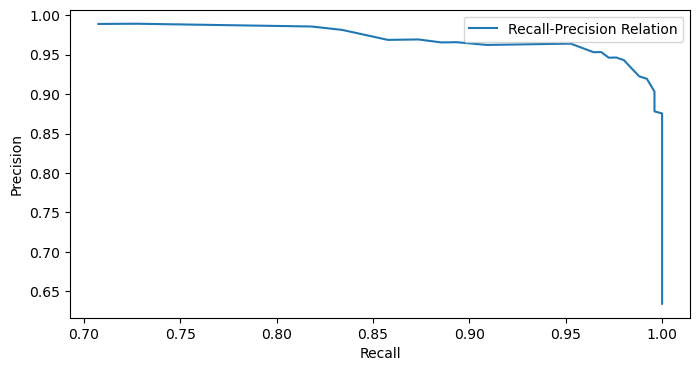

In [22]:
plt.figure(figsize=(8,4))
plt.plot(recall_list, precision_list, label='Recall-Precision Relation')
#plt.plot(threshold_list, precision_list, label='Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### 3.2. f1 score 계산후, 이 기준으로 판단시, 최선의 분류 임계치는 무엇인가?

#### f1 계산

In [23]:
precision_list = np.asarray(precision_list)
recall_list = np.asarray(recall_list)

f1_score_arr = 2 / ((1/recall_list) + (1/precision_list))
f1_score_arr[0:10]

array([0.77607362, 0.87091222, 0.87091222, 0.87091222, 0.87091222,
       0.87091222, 0.87091222, 0.87091222, 0.87091222, 0.87091222])

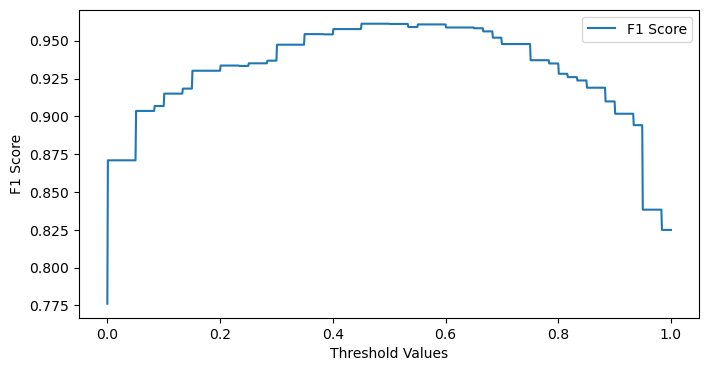

In [24]:
plt.figure(figsize=(8,4))
plt.plot(threshold_list, f1_score_arr, label='F1 Score')
plt.xlabel('Threshold Values')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

#### 최선의 분류임계치 (f1이 최고가 되는 임계값)

In [25]:
threshold_find = threshold_list[np.argmax(f1_score_arr)]
print(f'Best Threshold Value : {threshold_find}')

Best Threshold Value : 0.451


### 3-3 열로 추가해서 Accuracy 추정

In [26]:
df['y_pred'] = np.where(df.p_pred >= threshold_find, 1, 0)

In [27]:
cm = confusion_matrix(df.y_test, df.y_pred)
accuracy_s = (cm[0,0] + cm[1,1]) / cm.sum()
accuracy_s

0.949874686716792